## Corn Project Group 11

Group Members: 

Andrea Chavez Munoz, 
Ashvika Boopathy, 
Dheeraj Valluru, 
Kene Muogbo

Import Libraries

In [1]:
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

Read csv files drought by state and corn state

In [2]:
drought_df = pd.read_csv('Drought_by_State.csv')
corn_df = pd.read_csv('corn-state.csv')

Check for null values by using isnull function is pandas

In [3]:
print(drought_df.isnull().sum())
print(corn_df.isnull().sum())

MapDate              0
StateAbbreviation    0
None                 0
D0                   0
D1                   0
D2                   0
D3                   0
D4                   0
ValidStart           0
ValidEnd             0
StatisticFormatID    0
dtype: int64
Program                0
Year                   0
Period                 0
Week Ending         6069
Geo Level              0
State                  0
State ANSI             0
Ag District         6069
Ag District Code    6069
County              6069
County ANSI         6069
Zip Code            6069
Region              6069
watershed_code         0
Watershed           6069
Commodity              0
Data Item              0
Domain                 0
Domain Category        0
Value                  0
CV (%)              1129
dtype: int64


Check info on each dataframe in order to determine what needs to be cleaned

In [4]:
print(drought_df.info())
print(corn_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62036 entries, 0 to 62035
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MapDate            62036 non-null  int64  
 1   StateAbbreviation  62036 non-null  object 
 2   None               62036 non-null  float64
 3   D0                 62036 non-null  float64
 4   D1                 62036 non-null  float64
 5   D2                 62036 non-null  float64
 6   D3                 62036 non-null  float64
 7   D4                 62036 non-null  float64
 8   ValidStart         62036 non-null  object 
 9   ValidEnd           62036 non-null  object 
 10  StatisticFormatID  62036 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 5.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6069 entries, 0 to 6068
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  

## Data Cleaning

    -Change type of the StateAbbreviation variable to a string
    -On top of this change the types of both ValidStart and ValidEnd to datetime objects.
    -After this then replace the null values of the dataframe in order to use all observations of the dataframe

In [5]:
drought_df['StateAbbreviation'] = drought_df['StateAbbreviation'].astype('string')
drought_df['ValidStart'] = pd.to_datetime(drought_df['ValidStart'], errors = 'coerce')
drought_df['ValidEnd'] = pd.to_datetime(drought_df['ValidEnd'], errors = 'coerce')


corn_df = corn_df[['Year', 'State', 'Value',]]

corn_df['Value'] = corn_df['Value'].replace(['(D)'], '0')
corn_df['Value'] = corn_df['Value'].replace([' (D)'], '0')
corn_df['Value'] = pd.to_numeric(corn_df.Value.astype(str).str.replace(',',''), errors='coerce') \
              .fillna(0) \
              .astype('int64')

 - Rename the columns of the drought dataframe in order for the dataframe to be more relevant to the excercise.
 - Then group by Year and State in order to aggregate by sum

In [6]:
drought_df = drought_df.rename(columns = {'None': 'No drought' , 'D0' : 'Abnormally Dry' , 'D1':
                     'Moderate Drought', 'D2': 'Severe Drought', 'D3':
                     'Extreme Drought', 'D4': 'Exceptional Drought'})

drought_df["Start"] = pd.DatetimeIndex(drought_df["ValidStart"]).year

corn_df = corn_df.groupby(['Year', 'State'], as_index=False).sum()

Show the corn  and drought datasets which have been cleaned

In [7]:
corn_df

,Year,State,Value
0,1997,ALABAMA,196841
1,1997,ARIZONA,466938
2,1997,ARKANSAS,41671
3,1997,CALIFORNIA,7533442
4,1997,COLORADO,4032564
...,...,...,...
427,2019,VERMONT,2460
428,2019,VIRGINIA,4955
429,2019,WASHINGTON,18305
430,2019,WEST VIRGINIA,3368


In [8]:
drought_df

,MapDate,StateAbbreviation,No drought,Abnormally Dry,Moderate Drought,Severe Drought,Extreme Drought,Exceptional Drought,ValidStart,ValidEnd,StatisticFormatID,Start
0,20221108,AK,100.00,0.00,0.0,0.0,0.0,0.0,2022-11-08,2022-11-14,1,2022
1,20221101,AK,100.00,0.00,0.0,0.0,0.0,0.0,2022-11-01,2022-11-07,1,2022
2,20221025,AK,100.00,0.00,0.0,0.0,0.0,0.0,2022-10-25,2022-10-31,1,2022
3,20221018,AK,100.00,0.00,0.0,0.0,0.0,0.0,2022-10-18,2022-10-24,1,2022
4,20221011,AK,100.00,0.00,0.0,0.0,0.0,0.0,2022-10-11,2022-10-17,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
62031,20000201,WY,100.00,0.00,0.0,0.0,0.0,0.0,2000-02-01,2000-02-07,1,2000
62032,20000125,WY,85.98,14.02,0.0,0.0,0.0,0.0,2000-01-25,2000-01-31,1,2000
62033,20000118,WY,100.00,0.00,0.0,0.0,0.0,0.0,2000-01-18,2000-01-24,1,2000
62034,20000111,WY,100.00,0.00,0.0,0.0,0.0,0.0,2000-01-11,2000-01-17,1,2000


Drop unwanted columns because these columns are redundant

In [9]:
drought_df = drought_df.drop(['MapDate', 'ValidEnd', 'StatisticFormatID'], axis = 1)

Edit the dought dataframe grouping by the state abbreviation and start date while recording the mean

In [10]:
drought_df = drought_df.groupby(["StateAbbreviation", "Start"]).mean()
drought_df.reset_index(inplace=True)
drought_df = drought_df[(drought_df["Start"] >= 1997) & (drought_df["Start"] <= 2019)]
drought_df

,StateAbbreviation,Start,No drought,Abnormally Dry,Moderate Drought,Severe Drought,Extreme Drought,Exceptional Drought
0,AK,2000,97.750000,2.250000,0.000000,0.000000,0.000000,0.0
1,AK,2001,99.768077,0.231923,0.000000,0.000000,0.000000,0.0
2,AK,2002,85.784717,14.215283,0.094906,0.000000,0.000000,0.0
3,AK,2003,86.498462,13.501538,0.000000,0.000000,0.000000,0.0
4,AK,2004,75.127500,24.872500,1.868462,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...
1188,WY,2015,69.833846,30.166154,3.241346,0.144231,0.000000,0.0
1189,WY,2016,50.284808,49.715192,13.882692,3.464038,0.544423,0.0
1190,WY,2017,82.670000,17.330000,4.362308,0.185000,0.000000,0.0
1191,WY,2018,74.517500,25.482500,7.006346,1.422692,0.008269,0.0


Changed the column values of the US states to the state abbreviations in order to merge by the state

In [11]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

us_state_to_abbrev_new = {k.upper():v.upper() for k,v in us_state_to_abbrev.items()}

corn_df = corn_df.replace({"State" : us_state_to_abbrev_new})
corn_df.head()

,Year,State,Value
0,1997,AL,196841
1,1997,AZ,466938
2,1997,AR,41671
3,1997,CA,7533442
4,1997,CO,4032564


Giving the start and stateabbreviation columns representative names

In [12]:
drought_df.rename(columns = {"Start": "Year", "StateAbbreviation" : "State"}, inplace =True)
drought_df
corn_drought = drought_df.merge(corn_df, on = ["State", "Year"], how = "inner")

state_corn = corn_drought[corn_drought["State"] == "WY"][["No drought","Year","Value"]]
state_corn

,No drought,Year,Value
377,0.056981,2002,1411518
378,9.463846,2007,1293520
379,32.363585,2008,0
380,91.949615,2011,0
381,31.047115,2012,4170290
382,82.670000,2017,3393757


Dropping Hawaii because this state does not produce any corn at all

In [13]:
corn_drought=corn_drought[corn_drought.State != 'HI']
corn_drought

,State,Year,No drought,Abnormally Dry,Moderate Drought,Severe Drought,Extreme Drought,Exceptional Drought,Value
0,AL,2002,53.928868,46.071132,21.444717,6.885283,0.026226,0.000000,318594
1,AL,2007,13.719808,86.280192,72.025769,57.471538,44.695192,27.861154,172986
2,AL,2011,29.216731,70.783269,52.035962,31.701538,11.398462,0.912885,0
3,AL,2012,43.474423,56.525577,35.672308,21.986538,12.905962,2.026346,599337
4,AL,2017,62.858077,37.141923,19.183462,7.959423,1.903654,0.000000,594543
...,...,...,...,...,...,...,...,...,...
378,WY,2007,9.463846,90.536154,75.622692,53.528269,16.940000,0.000000,1293520
379,WY,2008,32.363585,67.636415,34.120377,12.368302,0.000000,0.000000,0
380,WY,2011,91.949615,8.050385,0.187500,0.000000,0.000000,0.000000,0
381,WY,2012,31.047115,68.952885,53.704808,41.492692,22.800962,2.364808,4170290


Pairplot to examine relations

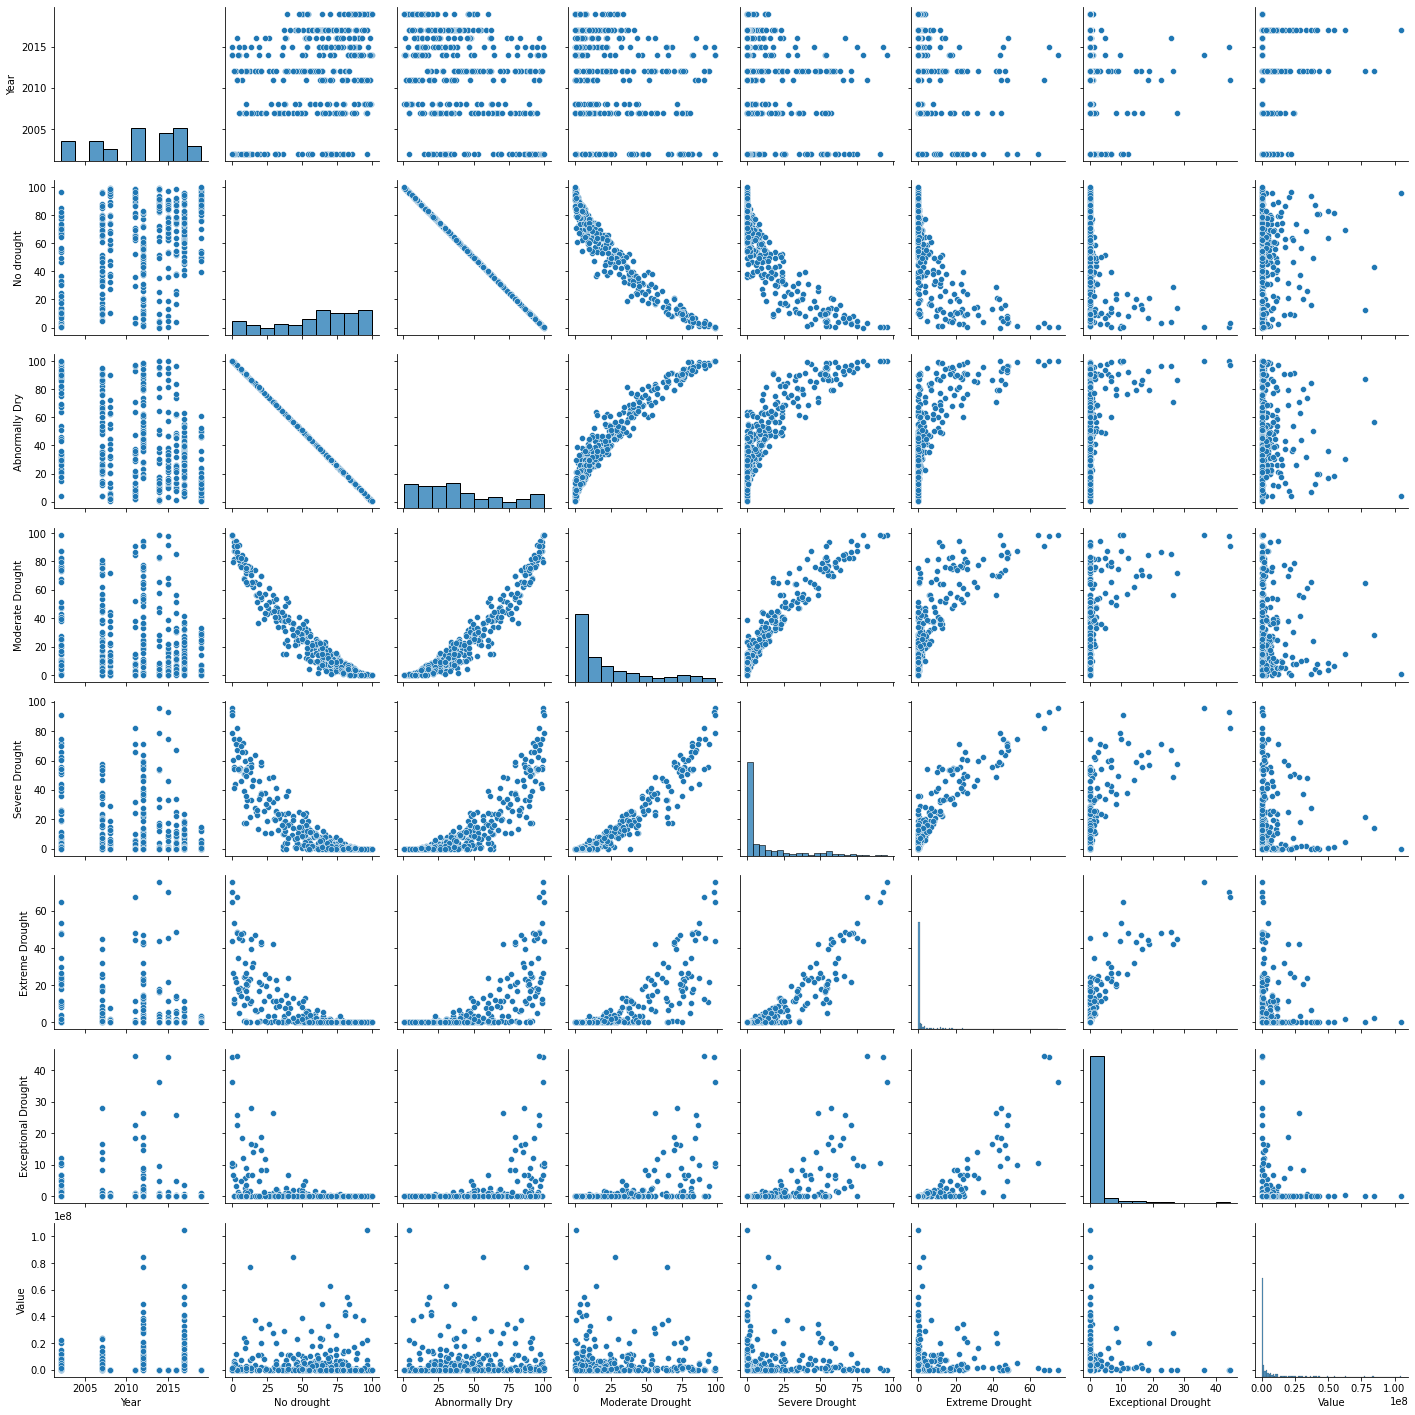

In [14]:
sns.pairplot(corn_drought)

Relatioship between year drought and corn value for no drought data

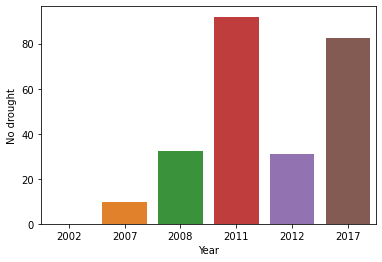

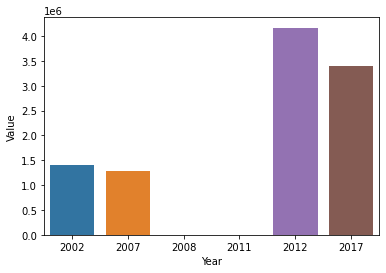

In [15]:
sns.barplot(data = state_corn, x = "Year", y = "No drought")
plt.show()
sns.barplot(data = state_corn, x = "Year", y = "Value")
plt.show()

- Normalize corn value by state. Finding max corn production of each state. Divide every corn value by its state max.
- Groupby columns on Col1 and estimate the maximum value of column Col2 for each group

In [16]:
max_corn_production = corn_drought.groupby(corn_drought['State'])['Value'].max()

In [17]:
max_corn_production.to_frame
max_corn_production

State
AL       599337
AR       241261
AZ      7504819
CA     77427895
CO     23007785
CT      2489244
DE       490657
FL      3370053
GA      5584441
IA     33974349
ID     49644917
IL     11507746
IN     12481859
KS     19828237
KY      7666287
LA       322715
MA      1547017
MD      4583280
ME      2582677
MI     37112072
MN     40418965
MO      7475740
MS       751028
MT      6558918
NC      4723641
ND     11435275
NE     27777289
NH      1273827
NJ       802801
NM     12044814
NV      1141193
NY     54301240
OH     20440399
OK      2350264
OR      6708583
PA     43453109
RI        83203
SC      1083014
SD     30976332
TN      3801789
TX     26013436
UT      8435502
VA     10799859
VT      9172232
WA     15702284
WI    105163166
WV      1494796
WY      4170290
Name: Value, dtype: int64

This code below will normalize our data.
We normalized by dividing corn values by its max value.

In [18]:
mergedData = pd.merge(corn_drought, max_corn_production, on ='State')
mergedData

,State,Year,No drought,Abnormally Dry,Moderate Drought,Severe Drought,Extreme Drought,Exceptional Drought,Value_x,Value_y
0,AL,2002,53.928868,46.071132,21.444717,6.885283,0.026226,0.000000,318594,599337
1,AL,2007,13.719808,86.280192,72.025769,57.471538,44.695192,27.861154,172986,599337
2,AL,2011,29.216731,70.783269,52.035962,31.701538,11.398462,0.912885,0,599337
3,AL,2012,43.474423,56.525577,35.672308,21.986538,12.905962,2.026346,599337,599337
4,AL,2017,62.858077,37.141923,19.183462,7.959423,1.903654,0.000000,594543,599337
...,...,...,...,...,...,...,...,...,...,...
374,WY,2007,9.463846,90.536154,75.622692,53.528269,16.940000,0.000000,1293520,4170290
375,WY,2008,32.363585,67.636415,34.120377,12.368302,0.000000,0.000000,0,4170290
376,WY,2011,91.949615,8.050385,0.187500,0.000000,0.000000,0.000000,0,4170290
377,WY,2012,31.047115,68.952885,53.704808,41.492692,22.800962,2.364808,4170290,4170290


In [19]:
mergedData['Norm']=mergedData['Value_x']/mergedData['Value_y']
mergedData

,State,Year,No drought,Abnormally Dry,Moderate Drought,Severe Drought,Extreme Drought,Exceptional Drought,Value_x,Value_y,Norm
0,AL,2002,53.928868,46.071132,21.444717,6.885283,0.026226,0.000000,318594,599337,0.531577
1,AL,2007,13.719808,86.280192,72.025769,57.471538,44.695192,27.861154,172986,599337,0.288629
2,AL,2011,29.216731,70.783269,52.035962,31.701538,11.398462,0.912885,0,599337,0.000000
3,AL,2012,43.474423,56.525577,35.672308,21.986538,12.905962,2.026346,599337,599337,1.000000
4,AL,2017,62.858077,37.141923,19.183462,7.959423,1.903654,0.000000,594543,599337,0.992001
...,...,...,...,...,...,...,...,...,...,...,...
374,WY,2007,9.463846,90.536154,75.622692,53.528269,16.940000,0.000000,1293520,4170290,0.310175
375,WY,2008,32.363585,67.636415,34.120377,12.368302,0.000000,0.000000,0,4170290,0.000000
376,WY,2011,91.949615,8.050385,0.187500,0.000000,0.000000,0.000000,0,4170290,0.000000
377,WY,2012,31.047115,68.952885,53.704808,41.492692,22.800962,2.364808,4170290,4170290,1.000000


Confirmation of our normalization using linear relationships

<AxesSubplot:xlabel='No drought', ylabel='Norm'>

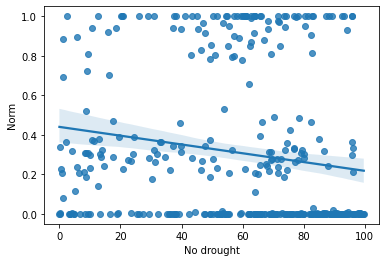

In [20]:
sns.regplot(data = mergedData, x = 'No drought', y = 'Norm')

<AxesSubplot:xlabel='Abnormally Dry', ylabel='Norm'>

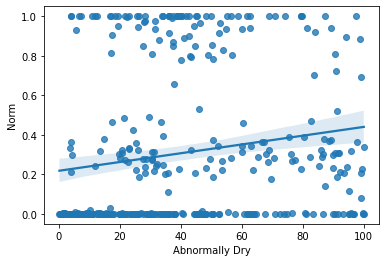

In [21]:
sns.regplot(data = mergedData, x = 'Abnormally Dry', y = 'Norm')

<AxesSubplot:xlabel='Moderate Drought', ylabel='Norm'>

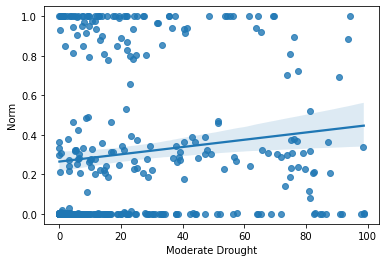

In [22]:
sns.regplot(data = mergedData, x = 'Moderate Drought', y = 'Norm')

<AxesSubplot:xlabel='Severe Drought', ylabel='Norm'>

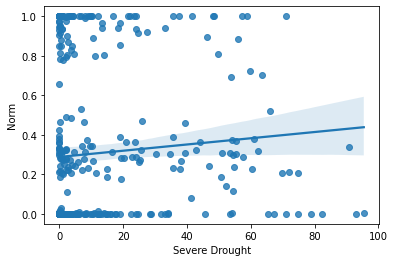

In [23]:
sns.regplot(data = mergedData, x = 'Severe Drought', y = 'Norm')

<AxesSubplot:xlabel='Extreme Drought', ylabel='Norm'>

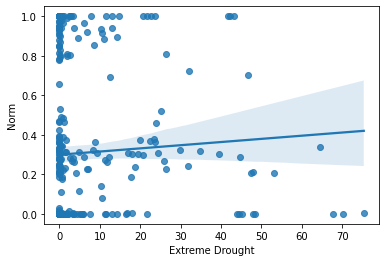

In [24]:
sns.regplot(data = mergedData, x = 'Extreme Drought', y = 'Norm')

<AxesSubplot:xlabel='Exceptional Drought', ylabel='Norm'>

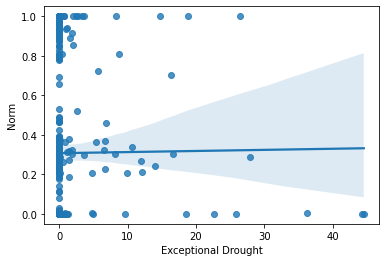

In [25]:
sns.regplot(data = mergedData, x = 'Exceptional Drought', y = 'Norm')

Another pairplot to show the difference of before and after the normalization

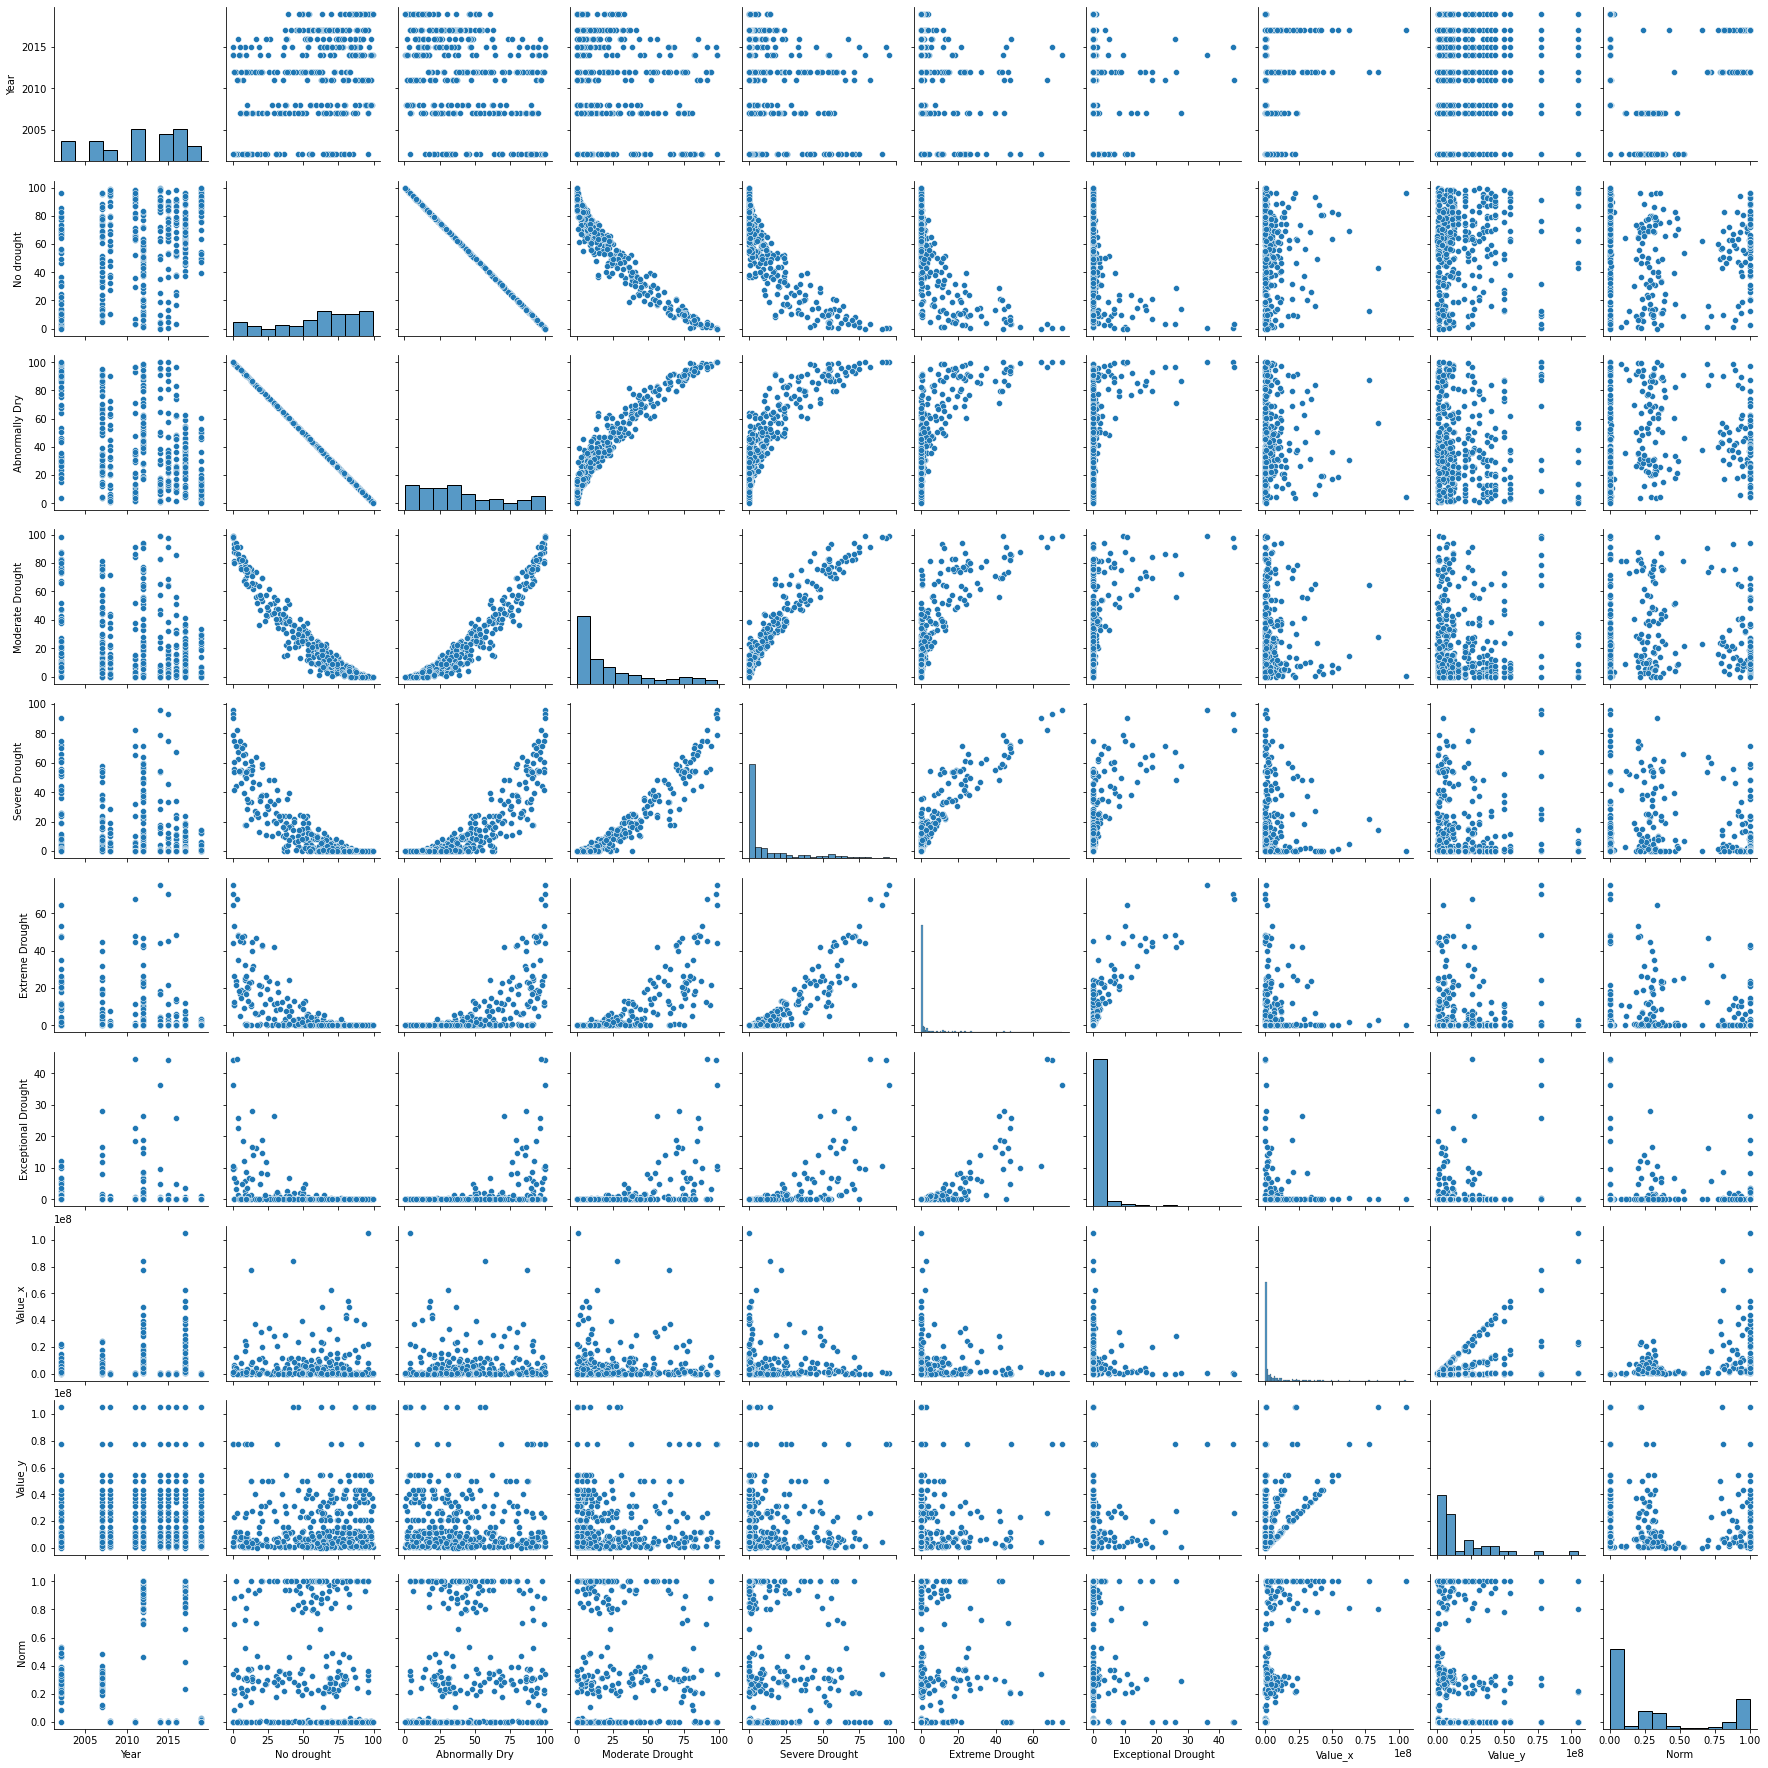

In [26]:
sns.pairplot(mergedData)

Partitioning the data using a train test split

In [27]:
target_names = ['Abnormally Dry', 'Moderate Drought', 'Severe Drought', 'Extreme Drought', 'Exceptional Drought']
X   = mergedData[target_names]        #get the input features
y   = mergedData['Norm']              #get the target

def reset_data_partition():
    X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7 #reproduce the results
                                                   )
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = reset_data_partition()

Creating an SVM model

In [28]:
# SVM
scaler = StandardScaler()
scaler.fit(X_train[target_names])

X_train[target_names] = scaler.transform(X_train[target_names]) #scale the training data
#NEW \/
X_test[target_names] = scaler.transform(X_test[target_names])
#NEW  /\

svm = SVR() #the default kernel is rbf

params = {'C': np.arange(1, 10),
         'gamma': np.arange(1, 5)}

#initialize Grid Search with Cross Validation
svm_grid = GridSearchCV(estimator = svm, param_grid = params, cv=5, return_train_score = True)
svm_grid.fit(X_train, y_train)


#NEW \/
y_pred   = svm_grid.predict(X_test)
print('The predicted Normalized Production is: {}'.format(y_pred))
#NEW  /\

print(svm_grid.best_params_) #print the best parameters
print(svm_grid.best_score_)  #print the best score

#display the cv results for the train and test set
cv_results = pd.DataFrame(svm_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

The predicted Normalized Production is: [0.09240956 0.08612808 0.09116939 0.09760673 0.45542032 0.11815789
 0.10285158 0.09625007 0.34608501 0.13505994 0.16791917 0.22382657
 0.36483019 0.43496679 0.11737846 0.21426396 0.09328457 0.24640469
 0.37377923 0.48085898 0.26894339 0.08991155 0.30136269 0.12305289
 0.36250374 0.05928484 0.09889239 0.10492786 0.09995928 0.10000304
 0.44237213 0.41791123 0.10014328 0.09767218 0.1260008  0.07883979
 0.03080712 0.09965866 0.38283734 0.24901494 0.35672331 0.41287448
 0.44793955 0.10505632 0.38304026 0.27834677 0.12080834 0.22125249
 0.35269662 0.19260095 0.27969279 0.25598607 0.12389285 0.09134593
 0.12209876 0.12532929 0.09894405 0.2547302  0.19043031 0.09309759
 0.43749994 0.36765508 0.0887868  0.13532389 0.09658599 0.03768404
 0.30358199 0.18308945 0.2910819  0.10027764 0.09910266 0.11596112
 0.09400764 0.43618383 0.09810312 0.08137504 0.10001993 0.100159
 0.0904666  0.19121721 0.2843619  0.19165124 0.09897044 0.42020521
 0.09894342 0.25382588 0

,mean_train_score,std_train_score,mean_test_score,std_test_score
0,0.121099,0.029035,-0.131118,0.062718
1,0.195940,0.027499,-0.161916,0.105277
3,0.285307,0.035615,-0.162016,0.166751
2,0.247389,0.029381,-0.171870,0.140771
7,0.337076,0.045990,-0.194177,0.196272


Our SVM model shows that the mean test score is a negative value varying between -0.194 and -0.131. Based off of SVM documentation we believe that values being negative would have no effect and can be interpreted as positive. Furthermore, this model has not done a good job predicting our data based on these results. Considering the table, it suggests there is high bias and low variance. The reason we can make this statement is because our data is based off of one factor which is precipitation, and ignores other agricultural factors.

Creating a KNN model

[0.32070133 0.23340596 0.07942109 0.07902416 0.45857899 0.22321848
 0.15475664 0.09608355 0.46583088 0.51845157 0.26065991 0.41283796
 0.4481938  0.4471043  0.30545541 0.36374801 0.07870479 0.43666811
 0.31976349 0.31659728 0.39379155 0.25772842 0.47719933 0.32059747
 0.6319398  0.22627193 0.15485462 0.07948534 0.12061061 0.00123255
 0.42792863 0.40317811 0.33160508 0.07890209 0.37299168 0.23224333
 0.20634286 0.17020125 0.6371938  0.22299291 0.46773268 0.48668949
 0.49203126 0.12062529 0.49116549 0.41237627 0.262573   0.33901562
 0.48799487 0.32898541 0.45104852 0.33089862 0.2654396  0.11016176
 0.38736925 0.15348709 0.22675759 0.4548816  0.2824629  0.33160508
 0.3313855  0.40700136 0.33446466 0.26041568 0.27679424 0.19033211
 0.31007366 0.26565245 0.51957788 0.00124596 0.22683896 0.33375648
 0.32311463 0.3225407  0.07907804 0.12281287 0.00124596 0.0961492
 0.41715319 0.29979959 0.34366535 0.29394717 0.09764514 0.62122582
 0.15485462 0.45352207 0.37234833 0.20639129 0.09783984 0.07902

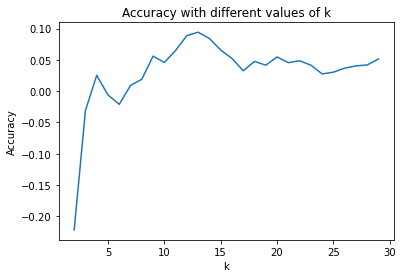

In [29]:
# KNN
X_train, X_test, y_train, y_test = reset_data_partition()

predict = {}

for k in range(2, 30):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    predict[k] = knn.score(X_test, y_test)
#     print(k, predict[k])

sns.lineplot(x=predict.keys(), y=predict.values()).set(title='Accuracy with different values of k', xlabel='k', ylabel='Accuracy')

# PREDICTION
knn_13 = KNeighborsRegressor(n_neighbors = 13) #initialize the classifier and set the number of neighbors
knn_13.fit(X_train, y_train)
y_pred = knn_13.predict(X_test)

print(y_pred)
print(f'The Accuracy of the model is {knn.score(X_test, y_test)}')

Based on the line plot above the highest accuracy we can acheive is just below 0.10. This can be accomplished with 13 neighbors.

Forest Regression model

In [30]:
X_train, X_test, y_train, y_test = reset_data_partition()

rf = RandomForestRegressor(random_state=7)
rf.fit(X_train, y_train)

#predict the labels for the test set
y_pred   = rf.predict(X_test)

print('The predicted value is: {}'.format(y_pred))

mse = mean_squared_error(y_test, y_pred)

# Evaluate the Predictions
print('The mse of the model is: {}'.format(mse))

The predicted value is: [4.07860472e-01 9.22374131e-02 4.03619689e-02 1.00510520e-03
 5.77966006e-01 1.31103482e-01 5.90307671e-01 3.09963894e-02
 4.51656801e-01 3.89648999e-01 1.54322619e-01 6.98511052e-01
 5.57232156e-01 6.42094883e-01 1.83244247e-01 3.18260168e-01
 3.07830569e-02 2.04385718e-01 3.39097950e-01 2.33565030e-01
 3.22660207e-01 4.17583364e-01 5.76606131e-01 1.49692090e-01
 8.92473615e-01 8.33301499e-02 5.07639369e-02 1.86492603e-02
 8.44521670e-02 3.25724679e-02 3.44788926e-01 2.95149458e-01
 1.52980879e-01 8.31554342e-02 3.62450548e-01 9.88227740e-02
 1.22624973e-01 3.17710630e-01 8.53051593e-01 1.99680022e-01
 3.68095907e-01 3.86414845e-01 2.18766252e-01 1.83953374e-02
 6.62107199e-01 1.46411862e-01 2.02853716e-01 2.74763686e-01
 5.33075641e-01 1.96488777e-01 3.83699195e-01 3.37714379e-01
 2.37539682e-01 1.56661238e-01 3.19028544e-01 2.61647773e-01
 2.20933235e-01 7.68194305e-01 3.68868467e-01 1.93628175e-01
 3.31030106e-01 3.54563062e-01 4.63502853e-01 1.22791002e-01


The mean squared error of the forest regression model is 0.143. This value is quite low in the scope of using the model to predict corn production for new data. A mean squared error of 0 represents a better quality estimator of data. Since our mse is quite close to 0 we can estimate that this regression did a good job modeling the data we provided it.

Conclusion:
Overall our models performed poorly. We believe that this is caused due to the lack of context our data provides. For instance, our data is solely driven off of precepitation results, instead of accounting for agriculture practices, seed-types, and surrounding vegetation. All of which can be confounding factors.